![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resources

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [1]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read `Salaries.csv` as a dataframe called `sal`.**

In [2]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)

**Check the head of the DataFrame.**

In [3]:
sal.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [5]:
# Your Code Here
sal.BasePay.mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [6]:
# Your Code Here
sal.BasePay.min()

-166.01

In [7]:
# Your Code Here
sal.BasePay.max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [8]:
# Your Code Here
sal.OvertimePay.mean()


5066.059886444622

In [9]:
# Your Code Here
sal.OvertimePay.min()

-0.01

In [10]:
# Your Code Here
sal.OvertimePay.max()

245131.88

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [17]:
# Your Code Here
sal.loc[sal.EmployeeName == 'JOSEPH DRISCOLL']['JobTitle'].values

array(['CAPTAIN, FIRE SUPPRESSION'], dtype=object)

In [18]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your Code Here
sal.loc[sal.EmployeeName == 'GARY JIMENEZ']['JobTitle'].values

array(['CAPTAIN III (POLICE DEPARTMENT)'], dtype=object)

**How much does JOSEPH DRISCOLL make (including benefits)?**

In [20]:
# Your Code Here
sal.loc[sal.EmployeeName == 'JOSEPH DRISCOLL']['TotalPayBenefits'].values

array([270324.91])

**What is the name of highest paid person (including benefits)?**

In [21]:
# Your Code Here
highest_paid = sal['TotalPayBenefits'].max()
sal.loc[sal.TotalPayBenefits == highest_paid]['EmployeeName'].values

array(['NATHANIEL FORD'], dtype=object)

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [23]:
# Your Code Here
highest_paid = sal['TotalPayBenefits'].min()
print("Lowest Paid: " + str(highest_paid))
sal.loc[sal.TotalPayBenefits == highest_paid]['EmployeeName'].values

Lowest Paid: -618.13


array(['Joe Lopez'], dtype=object)

### His benefits were negative

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [24]:
# Your Code Here
sal.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [26]:
# Your Code Here
len(sal.JobTitle.unique())

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [28]:
# Your Code Here
sal.JobTitle.value_counts()[:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [42]:
# Your Code Here
job_2013 = pd.DataFrame(sal.loc[sal.Year == 2013]['JobTitle'].value_counts())
len(job_2013.loc[job_2013.JobTitle == 1])

202

**How many people have the word Chief in their job title?**

In [50]:
def check_word(text):
  text = str(text).lower()
  if 'chief' in text:
    return True
  else:
    return False

sal[sal['JobTitle'].apply(check_word)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,JobTitleLower
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,"deputy chief of department,(fire department)"
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN,assistant deputy chief ii
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN,"battalion chief, (fire department)"
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN,"battalion chief, (fire department)"
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN,"chief of department, (fire department)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138011,138012,Sharon C Jackson,Chief Deputy Adlt Probation Of,56660.18,0.00,0.00,566.61,56660.18,57226.79,2014,NaN,San Francisco,NaN,chief deputy adlt probation of
139620,139621,Anita S Lee,Chief Clerk,38598.86,0.00,0.00,386.00,38598.86,38984.86,2014,NaN,San Francisco,NaN,chief clerk
139709,139710,George D Vaughan,Chief Nursery Specialist,27319.47,483.90,0.00,10334.67,27803.37,38138.04,2014,NaN,San Francisco,NaN,chief nursery specialist
140080,140081,Patrick W Gillespie,Chief Preparator,24091.00,0.00,0.00,10176.77,24091.00,34267.77,2014,NaN,San Francisco,NaN,chief preparator


## Data Visualization

**Implement seaborn's countplot with x='Year'**

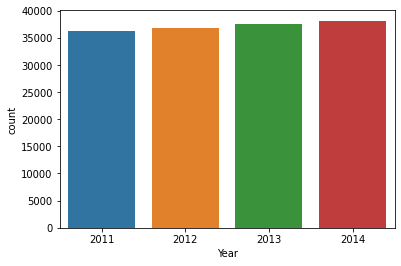

In [51]:
sns.countplot(x = "Year", data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

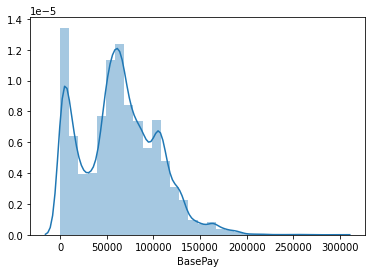

In [52]:
sns.distplot(sal[sal["Year"] == 2011]["BasePay"], bins = 30);

**How about other Year**

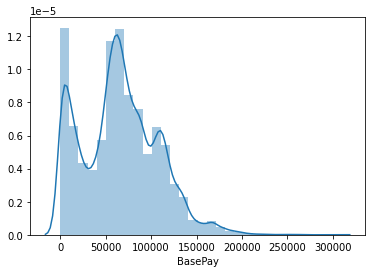

In [53]:
# Your Code Here for 2012
sns.distplot(sal[sal["Year"] == 2012]["BasePay"], bins = 30);

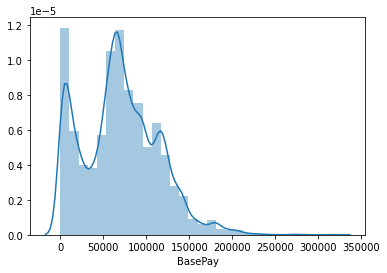

In [54]:
# Your Code Here for 2013
sns.distplot(sal[sal["Year"] == 2013]["BasePay"], bins = 30);

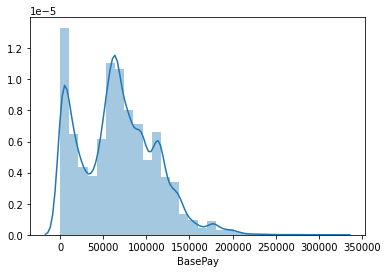

In [55]:
# Your Code Here for 2014
sns.distplot(sal[sal["Year"] == 2014]["BasePay"], bins = 30);

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [56]:
sal.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status', 'JobTitleLower'],
      dtype='object')

In [59]:
# Your Code Here
sal[['JobTitle', 'BasePay', 'Benefits', 'OvertimePay', 'OtherPay',  'TotalPay', 'TotalPayBenefits']]


,JobTitle,BasePay,Benefits,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,NaN,0.00,400184.25,567595.43,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,NaN,245131.88,137811.38,538909.28,538909.28
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,NaN,106088.18,16452.60,335279.91,335279.91
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,NaN,56120.71,198306.90,332343.61,332343.61
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,NaN,9737.00,182234.59,326373.19,326373.19
...,...,...,...,...,...,...,...
148649,Custodian,0.00,0.0,0.00,0.00,0.00,0.00
148650,Not provided,NaN,NaN,NaN,NaN,0.00,0.00
148651,Not provided,NaN,NaN,NaN,NaN,0.00,0.00
148652,Not provided,NaN,NaN,NaN,NaN,0.00,0.00


In [60]:
sal['Benefits'] = sal['TotalPayBenefits'] - sal['TotalPay']

In [66]:
# Your Code Here
top5_benifit = sal.sort_values(['Benefits'], ascending=False)[:5]
top5_benifit

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,JobTitleLower
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,NaN,San Francisco,NaN,chief investment officer
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,NaN,chief of police
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,NaN,"chief, fire department"
110537,110538,John L Martin,Dept Head V,311298.55,0.00,0.00,89772.32,311298.55,401070.87,2014,NaN,San Francisco,NaN,dept head v
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,NaN,asst med examiner


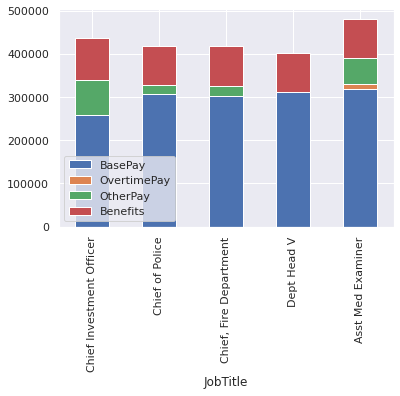

In [71]:
sns.set()
feature = ['JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
top5_benifit[feature].set_index('JobTitle').plot(kind='bar', stacked=True)

In [74]:
top5_basepay = sal.sort_values(['BasePay'], ascending=False)[:5]
top5_basepay

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,JobTitleLower
72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013,NaN,San Francisco,NaN,chief of police
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,NaN,asst med examiner
72929,72930,Robert L Shaw,"Dep Dir for Investments, Ret",315572.01,0.00,0.00,82849.66,315572.01,398421.67,2013,NaN,San Francisco,NaN,"dep dir for investments, ret"
72926,72927,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.00,23236.00,85431.39,336922.01,422353.40,2013,NaN,San Francisco,NaN,"chief, fire department"
72931,72932,Harlan L Kelly-Jr,Executive Contract Employee,313312.52,0.00,0.00,82319.51,313312.52,395632.03,2013,NaN,San Francisco,NaN,executive contract employee


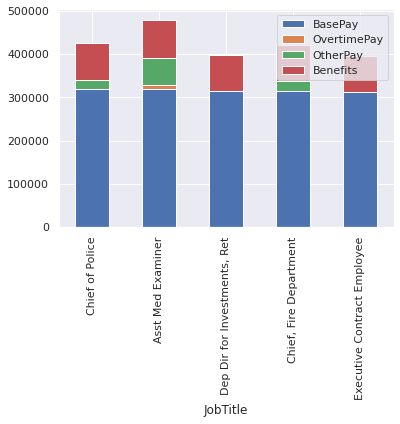

In [75]:
sns.set()
feature = ['JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
top5_basepay[feature].set_index('JobTitle').plot(kind='bar', stacked=True)

In [76]:
top5_OvertimePay = sal.sort_values(['OvertimePay'], ascending=False)[:5]
top5_OvertimePay

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,JobTitleLower
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,NaN,San Francisco,NaN,captain iii (police department)
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,NaN,San Francisco,NaN,"lieutenant, fire suppression"
72964,72965,Whitney P Yee,Deputy Sheriff,95123.00,196689.18,16622.66,36125.49,308434.84,344560.33,2013,NaN,San Francisco,NaN,deputy sheriff
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,NaN,San Francisco,NaN,emt/paramedic/firefighter
110574,110575,Antonio B Santiago,Deputy Sheriff,94191.04,173547.73,19740.81,38238.57,287479.58,325718.15,2014,NaN,San Francisco,NaN,deputy sheriff


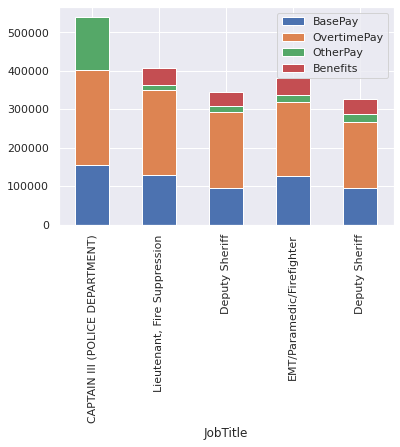

In [77]:
sns.set()
feature = ['JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
top5_OvertimePay[feature].set_index('JobTitle').plot(kind='bar', stacked=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


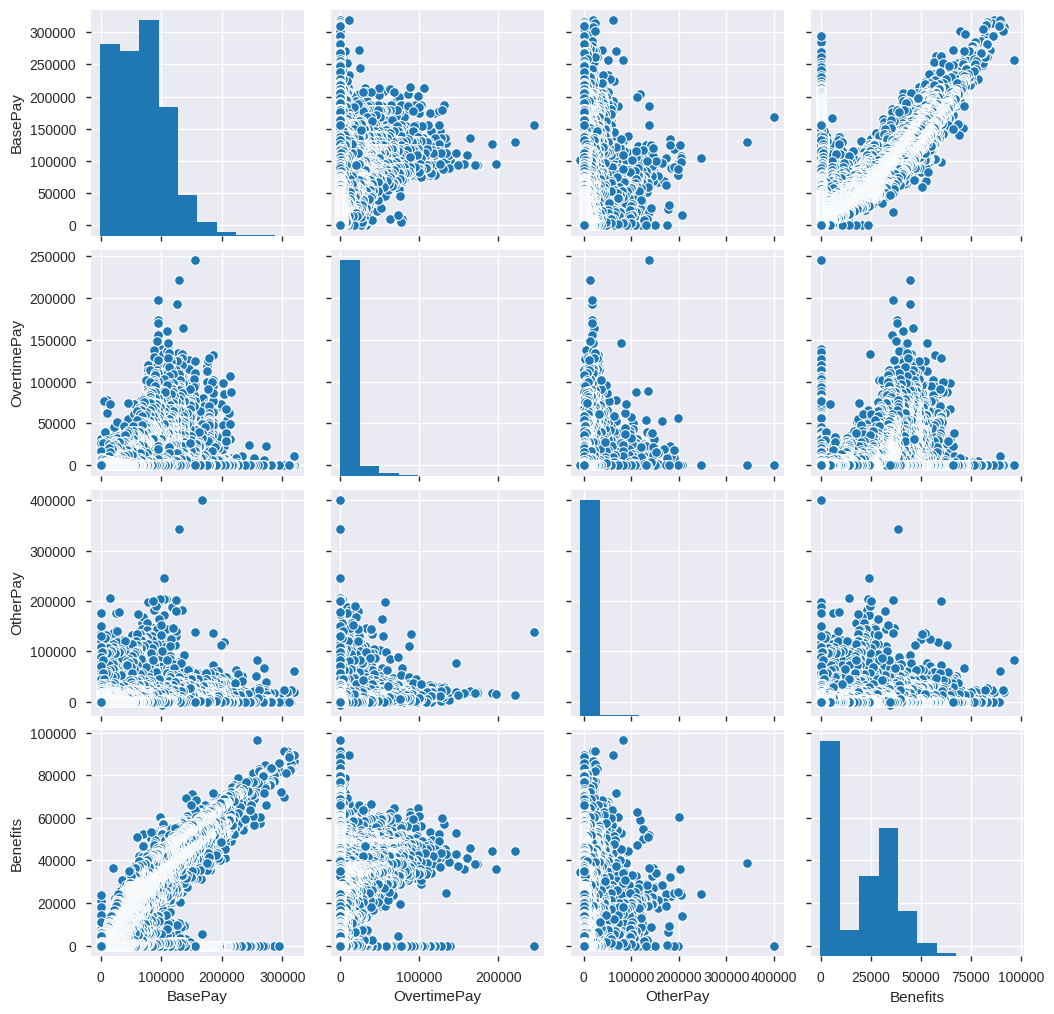

In [85]:
df = sal[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']]
df = df.fillna(0)
sns.pairplot(df, size=2.5)
# df.info()

In [87]:
df = sal.sort_values('TotalPayBenefits', ascending=False)[:5][['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']]
df 

,BasePay,OvertimePay,OtherPay,Benefits
0,167411.18,0.00,400184.25,0.00
1,155966.02,245131.88,137811.38,0.00
110531,129150.01,0.00,342802.63,38780.04
110532,318835.49,10712.95,60563.54,89540.23
110533,257340.00,0.00,82313.70,96570.66


**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [88]:
# Your Code Here
sal['lenght_of_job'] = sal.JobTitle.apply(lambda x: len(str(x)))

In [94]:
sal[['lenght_of_job', 'TotalPayBenefits']].corr(method='pearson')

,lenght_of_job,TotalPayBenefits
lenght_of_job,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


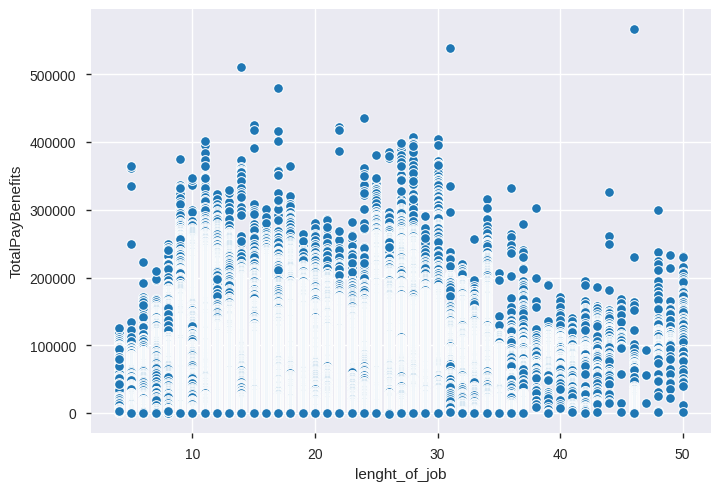

In [91]:
sns.scatterplot(x='lenght_of_job', y='TotalPayBenefits', data=sal)

# Great Job!